In [2]:
import pandas as pd 
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn import preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [3]:
data = pd.read_csv('BBC News.csv')

In [4]:
data.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


## understanding features and target variables

In [6]:
data['Category'].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [7]:
data.shape

(1490, 3)

In [8]:
data.dtypes

ArticleId     int64
Text         object
Category     object
dtype: object

## checking null values

In [9]:
data.isnull().any()

ArticleId    False
Text         False
Category     False
dtype: bool

## countplot of target variable(i.e category)

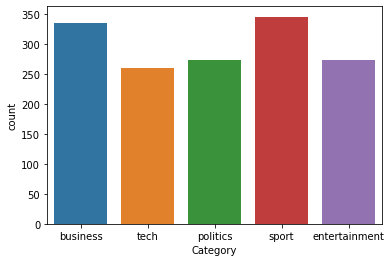

In [10]:
sns.countplot(data.Category)

In [12]:
data['News_length'] = data['Text'].str.len()

## Distribution plot

Text(0.5, 1.0, 'News length Distribution')

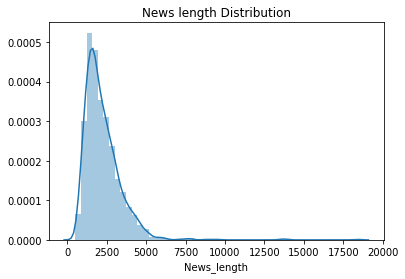

In [13]:
sns.distplot(data['News_length']).set_title('News length Distribution')

In [14]:
def create_wordcloud(words):
    wordcloud = WordCloud(width = 800, height=500, random_state = 21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

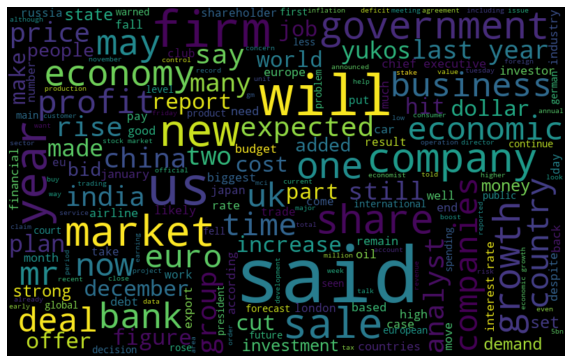

In [16]:
subset = data[data.Category=='business']
text = subset.Text.values
words = ' '.join(text)
create_wordcloud(words)

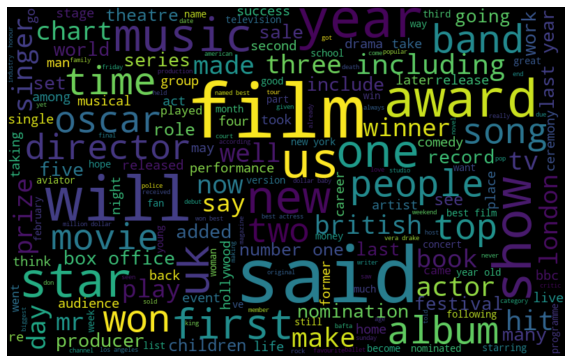

In [18]:
subset = data[data.Category=='entertainment']
text = subset.Text.values
words = ' '.join(text)
create_wordcloud(words)

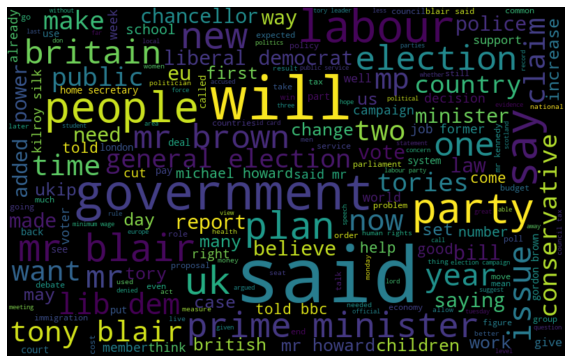

In [19]:
subset = data[data.Category=='politics']
text = subset.Text.values
words = ' '.join(text)
create_wordcloud(words)

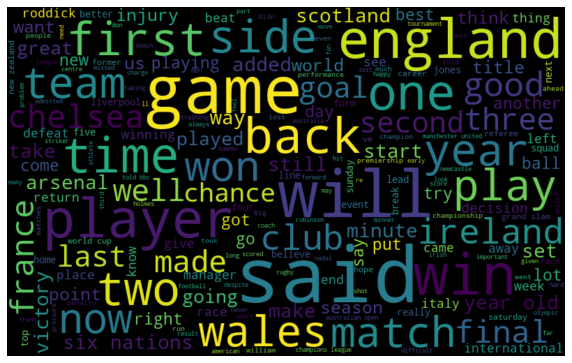

In [20]:
subset = data[data.Category=='sport']
text = subset.Text.values
words = ' '.join(text)
create_wordcloud(words)

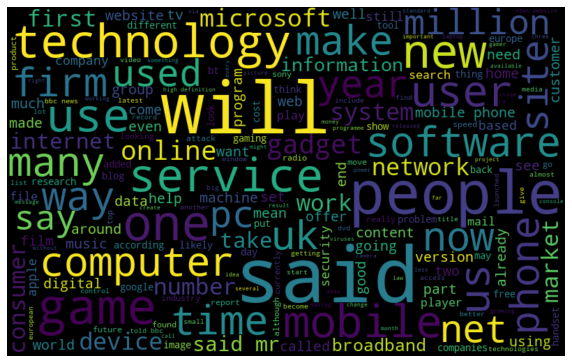

In [21]:
subset = data[data.Category=='tech']
text = subset.Text.values
words = ' '.join(text)
create_wordcloud(words)

## Cleaning Data

In [22]:
def process_text(text):
    text = text.lower().replace('\n', ' ').replace('\r', '').strip()
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    
    text = ' '.join(filtered_sentence)
    return text

In [23]:
data['Text_parsed'] = data['Text'].apply(process_text)

In [24]:
data.head()

,ArticleId,Text,Category,News_length,Text_parsed
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...


## Label Encoding

In [25]:
label_encoder = preprocessing.LabelEncoder()
data['category_target'] = label_encoder.fit_transform(data['Category'])

In [26]:
data.head()

,ArticleId,Text,Category,News_length,Text_parsed,category_target
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...,0
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...,0
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...,4
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...,0


In [27]:
data['category_target'].unique()

array([0, 4, 2, 3, 1], dtype=int64)

In [28]:
data.to_csv('BBC_News_Preprocessed.csv')

## Split the data in training and testing

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data['Text_parsed'], data['category_target'], test_size=0.2, random_state=8)

In [30]:
X_train.shape

(1192,)

In [31]:
X_test.shape

(298,)

In [32]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [33]:
tfidf = TfidfVectorizer(encoding = 'utf-8',
                        ngram_range = ngram_range,
                        stop_words = None,
                        lowercase = False,
                        max_df = max_df,
                        min_df = min_df,
                        max_features = max_features,
                        norm = 'l2',
                        sublinear_tf = True)

features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train

features_test = tfidf.fit_transform(X_test).toarray()
labels_test = y_test


In [34]:
features_train.shape

(1192, 300)

In [35]:
features_test.shape

(298, 300)

In [36]:
labels_train.shape

(1192,)

## Building Models

## Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
model = RandomForestClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy', accuracy_score(labels_test, model_predictions))
print('classifiaction report', classification_report(labels_test, model_predictions))


Accuracy 0.2785234899328859
classifiaction report               precision    recall  f1-score   support

           0       0.27      0.21      0.24        76
           1       0.22      0.30      0.25        47
           2       0.23      0.25      0.24        55
           3       0.33      0.26      0.29        65
           4       0.35      0.40      0.37        55

    accuracy                           0.28       298
   macro avg       0.28      0.28      0.28       298
weighted avg       0.28      0.28      0.28       298



## Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
model = LogisticRegression()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy', accuracy_score(labels_test, model_predictions))
print('classifiaction report', classification_report(labels_test, model_predictions))


Accuracy 0.35906040268456374
classifiaction report               precision    recall  f1-score   support

           0       0.36      0.24      0.29        76
           1       0.28      0.28      0.28        47
           2       0.36      0.29      0.32        55
           3       0.46      0.58      0.51        65
           4       0.30      0.40      0.34        55

    accuracy                           0.36       298
   macro avg       0.35      0.36      0.35       298
weighted avg       0.36      0.36      0.35       298



## KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy', accuracy_score(labels_test, model_predictions))
print('classifiaction report', classification_report(labels_test, model_predictions))


Accuracy 0.29194630872483224
classifiaction report               precision    recall  f1-score   support

           0       0.28      0.20      0.23        76
           1       0.26      0.23      0.25        47
           2       0.17      0.25      0.21        55
           3       0.51      0.38      0.44        65
           4       0.30      0.40      0.34        55

    accuracy                           0.29       298
   macro avg       0.31      0.29      0.29       298
weighted avg       0.31      0.29      0.30       298



## Decision tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy', accuracy_score(labels_test, model_predictions))
print('classifiaction report', classification_report(labels_test, model_predictions))


Accuracy 0.20469798657718122
classifiaction report               precision    recall  f1-score   support

           0       0.23      0.24      0.23        76
           1       0.29      0.32      0.30        47
           2       0.21      0.20      0.20        55
           3       0.17      0.09      0.12        65
           4       0.14      0.20      0.16        55

    accuracy                           0.20       298
   macro avg       0.21      0.21      0.20       298
weighted avg       0.21      0.20      0.20       298



## Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy', accuracy_score(labels_test, model_predictions))
print('classifiaction report', classification_report(labels_test, model_predictions))


Accuracy 0.18120805369127516
classifiaction report               precision    recall  f1-score   support

           0       0.28      0.41      0.33        76
           1       0.07      0.06      0.07        47
           2       0.09      0.11      0.10        55
           3       0.00      0.00      0.00        65
           4       0.18      0.25      0.21        55

    accuracy                           0.18       298
   macro avg       0.12      0.17      0.14       298
weighted avg       0.13      0.18      0.15       298



C:\Users\Priyanka\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Hyper parameter tuning (Random Forest)

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5,8,15,25,30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1,2,5,10]

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)
hyperF

{'n_estimators': [100, 300, 500, 800, 1200],
 'max_depth': [5, 8, 15, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [44]:
model = RandomForestClassifier()
gridF = GridSearchCV(model, hyperF, cv=3, verbose=1, n_jobs = -1)
bestF = gridF.fit(features_train, labels_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  9.5min finished


In [45]:
bestF.best_params_

{'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 300}

## Random forest with grid search parameters

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
model = RandomForestClassifier(random_state=1, max_depth = 30, min_samples_leaf = 1, min_samples_split=5, n_estimators=500)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy', accuracy_score(labels_test, model_predictions))
print('classifiaction report', classification_report(labels_test, model_predictions))


Accuracy 0.28523489932885904
classifiaction report               precision    recall  f1-score   support

           0       0.33      0.20      0.25        76
           1       0.21      0.26      0.23        47
           2       0.23      0.29      0.25        55
           3       0.32      0.29      0.31        65
           4       0.35      0.42      0.38        55

    accuracy                           0.29       298
   macro avg       0.29      0.29      0.28       298
weighted avg       0.29      0.29      0.28       298



## Hyper Parameter Tuning (Logistic Regression) 

In [47]:
param_grid = {'C': [0.1, 0.001, 1], 'penalty':['l1', 'l2']}
model = LogisticRegression()
clf = GridSearchCV(model, param_grid, cv=3, verbose=1)
bestF = clf.fit(features_train, labels_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Priyanka\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Priyanka\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Priyanka\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' p

In [48]:
bestF.best_params_

{'C': 1, 'penalty': 'l2'}

In [49]:
model = LogisticRegression(C = 1, penalty='l2')
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy', accuracy_score(labels_test, model_predictions))
print('classifiaction report', classification_report(labels_test, model_predictions))


Accuracy 0.35906040268456374
classifiaction report               precision    recall  f1-score   support

           0       0.36      0.24      0.29        76
           1       0.28      0.28      0.28        47
           2       0.36      0.29      0.32        55
           3       0.46      0.58      0.51        65
           4       0.30      0.40      0.34        55

    accuracy                           0.36       298
   macro avg       0.35      0.36      0.35       298
weighted avg       0.36      0.36      0.35       298



## Hyper Parameter Tuning (Kneighbors Classifier) 

In [50]:
params_KNN = {'n_neighbors': [1,2,3,4,5,6,7], 'p':[1,2,5]}
model = KNeighborsClassifier()
gridF = GridSearchCV(model, params_KNN, cv=3, verbose=1, n_jobs=-1)
bestF = gridF.fit(features_train, labels_train)

Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:   11.8s finished


In [51]:
bestF.best_params_

{'n_neighbors': 7, 'p': 2}

In [52]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors =3, p= 2)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy', accuracy_score(labels_test, model_predictions))
print('classifiaction report', classification_report(labels_test, model_predictions))


Accuracy 0.29194630872483224
classifiaction report               precision    recall  f1-score   support

           0       0.28      0.28      0.28        76
           1       0.23      0.23      0.23        47
           2       0.17      0.20      0.19        55
           3       0.56      0.38      0.45        65
           4       0.28      0.35      0.31        55

    accuracy                           0.29       298
   macro avg       0.30      0.29      0.29       298
weighted avg       0.31      0.29      0.30       298



## Doc2Vec

In [53]:
data_processed = pd.read_csv('BBC_News_Preprocessed.csv')

In [54]:
data_processed.columns

Index(['Unnamed: 0', 'ArticleId', 'Text', 'Category', 'News_length',
       'Text_parsed', 'category_target'],
      dtype='object')

In [55]:
data = pd.DataFrame()

In [56]:
data['Text'] = data_processed['Text_parsed']
data['Category'] = data_processed['category_target']

In [57]:
data.head()

,Text,Category
0,worldcom exboss launches defence lawyers defen...,0
1,german business confidence slides german busin...,0
2,bbc poll indicates economic gloom citizens maj...,0
3,lifestyle governs mobile choice faster better ...,4
4,enron bosses 168m payout eighteen former enron...,0


In [58]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

In [59]:
def label_sentences(corpus, label_type):
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    return labeled
X_train, X_test, y_train, y_test = train_test_split(data.Text, data.Category, random_state = 0, test_size = 0.2)

In [60]:
X_train[:5]

776     redraft eu patent law proposed european law so...
420     piero gives rugby perspective bbc sport unveil...
1430    aviator creator oscars snub man said got oscar...
678     napster offers rented music go music downloadi...
1277    cuba winds back economic clock fidel castro de...
Name: Text, dtype: object

In [61]:
X_train.shape

(1192,)

In [62]:
X_test.shape

(298,)

In [63]:
X_train = label_sentences(X_train, 'Train')

In [64]:
X_train[0]

TaggedDocument(words=['redraft', 'eu', 'patent', 'law', 'proposed', 'european', 'law', 'software', 'patents', 'redrafted', 'european', 'commission', 'ec', 'despite', 'requests', 'meps', 'law', 'proving', 'controversial', 'limbo', 'year', 'major', 'tech', 'firms', 'say', 'needed', 'protect', 'inventions', 'others', 'fear', 'hurt', 'smaller', 'tech', 'firms', 'ec', 'says', 'council', 'ministers', 'adopt', 'draft', 'version', 'agreed', 'upon', 'last', 'may', 'said', 'would', 'review', 'aspects', 'directive', 'directive', 'intended', 'offer', 'patent', 'protection', 'inventions', 'use', 'software', 'achieve', 'effect', 'words', 'computer', 'implemented', 'invention', 'letter', 'ec', 'president', 'jos233', 'manuel', 'barroso', 'told', 'president', 'european', 'parliament', 'josep', 'borrell', 'commission', 'intend', 'refer', 'new', 'proposal', 'parliament', 'council', 'ministers', 'supported', 'agreement', 'reached', 'ministers', 'may', '2004', 'european', 'council', 'agrees', 'draft', 'dir

In [65]:
X_test = label_sentences(X_test, 'Test')

In [66]:
all_data = X_train + X_test

In [67]:
from sklearn import utils
model_dbow = Doc2Vec(dm =0, vector_size = 300, negative =5, min_count=1, alpha=0.065)
model_dbow.build_vocab([x for x in all_data])

for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in all_data]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_data = model_dbow.alpha

In [68]:
import numpy as np
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
        
    return vectors

In [69]:
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

In [70]:
train_vectors_dbow.shape

(1192, 300)

In [71]:
test_vectors_dbow.shape

(298, 300)

In [72]:
train_vectors_dbow[:5]

array([[-0.24253045, -0.36073977,  0.36383182, ..., -0.39819676,
         0.60302377,  0.15519205],
       [-0.52574772, -0.21038145,  0.90602076, ..., -0.02376367,
        -0.39114937,  0.20015162],
       [ 0.43594185, -0.0263883 ,  0.16751727, ..., -0.57393599,
         0.59607446,  0.15381348],
       [-0.36198989,  0.10086679,  0.47015941, ..., -0.51140499,
         0.14648761,  0.17175032],
       [-0.22417356,  0.18178757, -0.59179109, ...,  1.13427472,
         0.43247059, -0.4422951 ]])

## Logistic Regression

In [73]:
model = LogisticRegression()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.9664429530201343
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        64
           1       0.95      0.97      0.96        63
           2       0.95      0.98      0.96        53
           3       1.00      0.95      0.98        65
           4       0.94      0.96      0.95        53

    accuracy                           0.97       298
   macro avg       0.97      0.97      0.97       298
weighted avg       0.97      0.97      0.97       298



C:\Users\Priyanka\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [74]:
model = LogisticRegression(C=1e5)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.9798657718120806
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        64
           1       0.97      1.00      0.98        63
           2       0.96      0.98      0.97        53
           3       1.00      0.97      0.98        65
           4       0.98      0.96      0.97        53

    accuracy                           0.98       298
   macro avg       0.98      0.98      0.98       298
weighted avg       0.98      0.98      0.98       298

